In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tested = pd.read_csv("KDDTest+.txt" , sep = "," , encoding = 'utf-8')
trained = pd.read_csv("KDDTrain+.txt" , sep = "," , encoding = 'utf-8')

In [ ]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [ ]:
trained.columns = Columns
tested.columns = Columns

In [ ]:
trained

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [ ]:
tested

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [ ]:
trained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
Results = set(trained['attack'].values)
print(Results,end=" ")

{'neptune', 'guess_passwd', 'multihop', 'back', 'land', 'satan', 'pod', 'nmap', 'normal', 'ipsweep', 'teardrop', 'imap', 'spy', 'warezclient', 'loadmodule', 'warezmaster', 'ftp_write', 'buffer_overflow', 'portsweep', 'phf', 'perl', 'smurf', 'rootkit'} 

In [ ]:
trained_attack = trained.attack.map(lambda a: 0 if a == 'normal' else 1)
tested_attack = tested.attack.map(lambda a: 0 if a == 'normal' else 1)

trained['attack_state'] = trained_attack
tested['attack_state'] = tested_attack

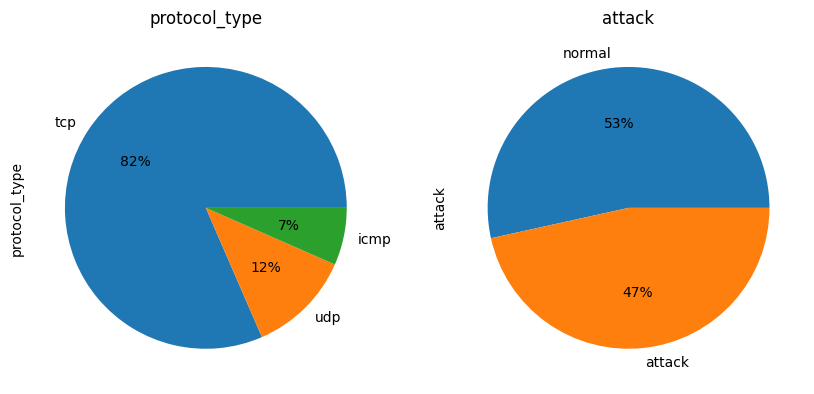

In [ ]:
trained.loc[trained['attack'] == "normal", "attack"] = 'normal'
trained.loc[trained['attack'] != 'normal', "attack"] = 'attack'
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(10, 10), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

pie_plot(trained, ['protocol_type','attack'],1,2)

In [ ]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0

    return attack_type

In [ ]:
attack_map = trained.attack.apply(map_attack)
trained['attack_map'] = attack_map

test_attack_map = tested.attack.apply(map_attack)
tested['attack_map'] = test_attack_map

le=LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    trained[x]=le.fit_transform(trained[x])
    tested[x]=le.fit_transform(tested[x])

In [ ]:
trained.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_map
0,0,2,44,9,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,1,15,0,0
1,0,1,49,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,0,19,1,0
2,0,1,24,9,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,1,21,0,0
3,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,1,21,0,0
4,0,1,49,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,0,21,1,0


In [ ]:
trained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  int64  
 2   service                      125972 non-null  int64  
 3   flag                         125972 non-null  int64  
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
X_train = trained.drop('attack_state',axis=1)
X_train = X_train.drop('attack',axis=1)
X_train = X_train.drop('attack_map',axis=1)
X_train = X_train.drop('level',axis=1)
y_train = trained[['attack_state']]

X_train, X_test, Y_train, Y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((100777, 41), (100777, 1))

In [ ]:
X_test.shape, Y_test.shape

((25195, 41), (25195, 1))

In [ ]:
trained

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_map
0,0,2,44,9,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,1,15,0,0
1,0,1,49,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,19,1,0
2,0,1,24,9,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,1,21,0,0
3,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,21,0,0
4,0,1,49,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,0,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,20,1,0
125968,8,2,49,9,105,145,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,1,21,0,0
125969,0,1,54,9,2231,384,0,0,0,0,...,0.00,0.00,0.72,0.00,0.01,0.00,1,18,0,0
125970,0,1,30,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,0,20,1,0


Deep Learning Algorithms

In [ ]:
from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
from keras.callbacks import History
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2

X_train = np.array(X_train)
X_test = np.array(X_test)
#cnn-input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#lstm-input

Y_train = np.array(Y_train)

CNN_LSTM_model = Sequential() # initializing model
#lstm
# cnn-lstm
CNN_LSTM_model.add(Conv1D(32, 9, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
CNN_LSTM_model.add(MaxPool1D(pool_size=(2)))
CNN_LSTM_model.add(LSTM(units=16,return_sequences=False,dropout=0.2))
CNN_LSTM_model.add(Dense(units=1))

CNN_LSTM_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= CNN_LSTM_model.fit(X_train, Y_train, epochs=100, batch_size=250, validation_data=(X_test, Y_test))

Epoch 1/100
404/404 [==============================] - 17s 35ms/step - loss: 0.4192 - accuracy: 0.8548 - val_loss: 0.2126 - val_accuracy: 0.8877
Epoch 2/100
404/404 [==============================] - 13s 31ms/step - loss: 0.2309 - accuracy: 0.8972 - val_loss: 0.1630 - val_accuracy: 0.9396
Epoch 3/100
404/404 [==============================] - 12s 30ms/step - loss: 0.1760 - accuracy: 0.9328 - val_loss: 0.1355 - val_accuracy: 0.9584
Epoch 4/100
404/404 [==============================] - 13s 31ms/step - loss: 0.1470 - accuracy: 0.9516 - val_loss: 0.1097 - val_accuracy: 0.9647
Epoch 5/100
404/404 [==============================] - 13s 31ms/step - loss: 0.1453 - accuracy: 0.9485 - val_loss: 0.1013 - val_accuracy: 0.9677
Epoch 6/100
404/404 [==============================] - 15s 36ms/step - loss: 0.1208 - accuracy: 0.9597 - val_loss: 0.0956 - val_accuracy: 0.9709
Epoch 7/100
404/404 [==============================] - 14s 34ms/step - loss: 0.1638 - accuracy: 0.9396 - val_loss: 0.1448 - val_ac

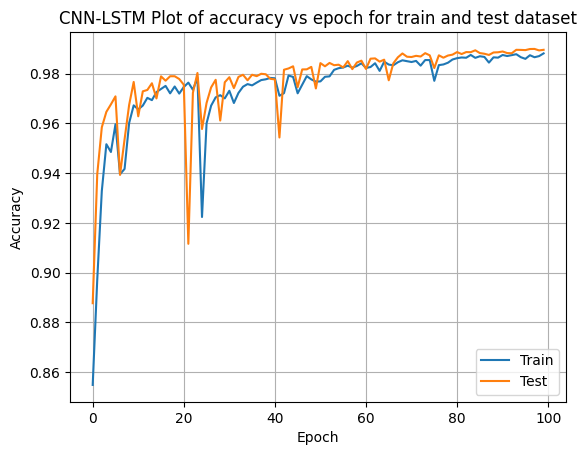

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.title("CNN-LSTM Plot of accuracy vs epoch for train and test dataset")
plt.grid(True)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score, precision_score,recall_score

In [ ]:
y_pred_CNN_LSTM = CNN_LSTM_model.predict(X_test)
y_pred_CNN_LSTM = (y_pred_CNN_LSTM>0.5)

788/788 [==============================] - 3s 3ms/step


In [ ]:
accuracy = metrics.accuracy_score(Y_test,y_pred_CNN_LSTM)
sensitivity = metrics.recall_score(Y_test,y_pred_CNN_LSTM)
precision = metrics.precision_score(Y_test,y_pred_CNN_LSTM)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.99
Sensitvity  = 0.987
Precision   = 0.991


In [ ]:
from keras.layers import Dense, SimpleRNN
def create_RNN(hidden_units, dense_units, input_shape, activation):
    RNN_model = Sequential()
    RNN_model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    RNN_model.add(Dense(units=dense_units, activation=activation[1]))
    RNN_model.compile(loss='mean_squared_error', optimizer='adam')
    return RNN_model

In [ ]:
RNN_model = create_RNN(hidden_units=3, dense_units=1, input_shape=(X_train.shape[1],1),
                   activation=['tanh', 'tanh'])
RNN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history= RNN_model.fit(X_train, Y_train, epochs=100, batch_size=250, validation_data=(X_test, Y_test))

Epoch 1/100
404/404 [==============================] - 7s 15ms/step - loss: 0.1357 - accuracy: 0.8249 - val_loss: 0.0916 - val_accuracy: 0.8675
Epoch 2/100
404/404 [==============================] - 3s 8ms/step - loss: 0.0855 - accuracy: 0.8805 - val_loss: 0.0830 - val_accuracy: 0.8991
Epoch 3/100
404/404 [==============================] - 4s 11ms/step - loss: 0.0806 - accuracy: 0.9042 - val_loss: 0.0796 - val_accuracy: 0.9033
Epoch 4/100
404/404 [==============================] - 4s 11ms/step - loss: 0.0778 - accuracy: 0.9056 - val_loss: 0.0776 - val_accuracy: 0.9097
Epoch 5/100
404/404 [==============================] - 3s 8ms/step - loss: 0.0758 - accuracy: 0.9083 - val_loss: 0.0757 - val_accuracy: 0.9066
Epoch 6/100
404/404 [==============================] - 3s 9ms/step - loss: 0.0740 - accuracy: 0.9086 - val_loss: 0.0740 - val_accuracy: 0.9005
Epoch 7/100
404/404 [==============================] - 5s 12ms/step - loss: 0.0699 - accuracy: 0.9098 - val_loss: 0.0642 - val_accuracy: 0.

In [ ]:
y_pred_RNN = RNN_model.predict(X_test)
y_pred_RNN = (y_pred_RNN>0.5)
accuracy = metrics.accuracy_score(Y_test,y_pred_RNN)
sensitivity = metrics.recall_score(Y_test,y_pred_RNN)
precision = metrics.precision_score(Y_test,y_pred_RNN)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

788/788 [==============================] - 2s 3ms/step
Accuracy    = 0.953
Sensitvity  = 0.945
Precision   = 0.955


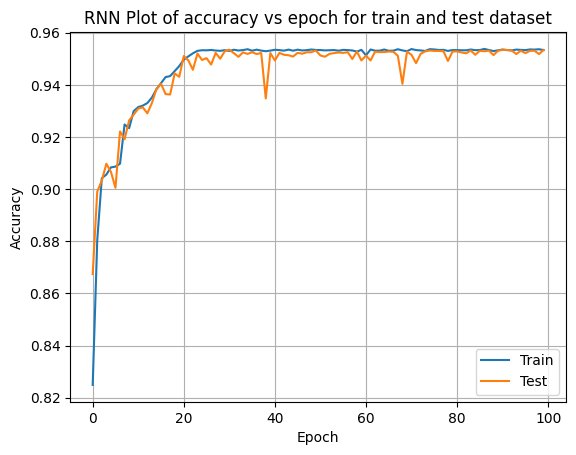

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.title("RNN Plot of accuracy vs epoch for train and test dataset")
plt.grid(True)

In [ ]:
y_pred_RNN = RNN_model.predict(X_test)
y_pred_RNN = (y_pred_RNN>0.5)

788/788 [==============================] - 2s 3ms/step


In [ ]:
accuracy = metrics.accuracy_score(Y_test,y_pred_RNN)
sensitivity = metrics.recall_score(Y_test,y_pred_RNN)
precision = metrics.precision_score(Y_test,y_pred_RNN)
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.941
Sensitvity  = 0.933
Precision   = 0.941


Simple Machine Learning Algorithms

In [ ]:
#Logistic Regression
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)
# Predict probabilities on the test set
y_pred_prob = lr.predict_proba(x_test)[:, 1]
# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)
# Predict probabilities on the test set
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]
# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Naive Bayes
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)
# Predict probabilities on the test set
y_pred_prob_gnb = gnb.predict_proba(x_test)[:, 1]
# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_gnb)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Support Machine Vector
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)
# Calculate the decision function for the testing data
y_score_svc = lin_svc.decision_function(x_test)
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score_svc)

# Calculate the area under the ROC curve
auc_score = roc_auc_score(y_test, y_score_svc)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'LinearSVC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)
# Predict probabilities on the test set
y_pred_prob_tdt = tdt.predict_proba(x_test)[:, 1]
# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_tdt)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
# Feature importances for Decision Tree
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()
#Ploting of the tree
features_names = data_train.drop(['outcome', 'level'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

In [ ]:
#Random Forest
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

# Predict probabilities on the test set
y_pred_prob_rf = rf.predict_proba(x_test)[:, 1]
# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
#Building an XGBOOST REgressor regressor in order to predict threat level
xg_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 20).fit(x_train_reg, y_train_reg)
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(x_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(x_test_reg), squared=False)
print("Training Error " + str(name) + " {}  Test error ".format(train_error) + str(name) + " {}".format(test_error))
y_pred = xg_r.predict(x_test_reg)
df = pd.DataFrame({"Y_test": y_test_reg , "Y_pred" : y_pred})
plt.figure(figsize=(16,8))
plt.plot(df[:80])
plt.legend(['Actual' , 'Predicted'])
# predict the probabilities for the test data
y_pred_xg_r = xg_r.predict(x_test)
# Compute false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_xg_r)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()